In [11]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [5]:
!pip install finance-datareader

In [12]:
import FinanceDataReader as fdr
df = fdr.DataReader('005930', '2025-01-01')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2025-01-02,52700,53600,52300,53400,16630538,0.003759
2025-01-03,52800,55100,52800,54400,19318046,0.018727
2025-01-06,54400,56200,54300,55900,19034284,0.027574
2025-01-07,56800,57300,55400,55400,17030235,-0.008945
2025-01-08,54800,57500,54700,57300,26593553,0.034296


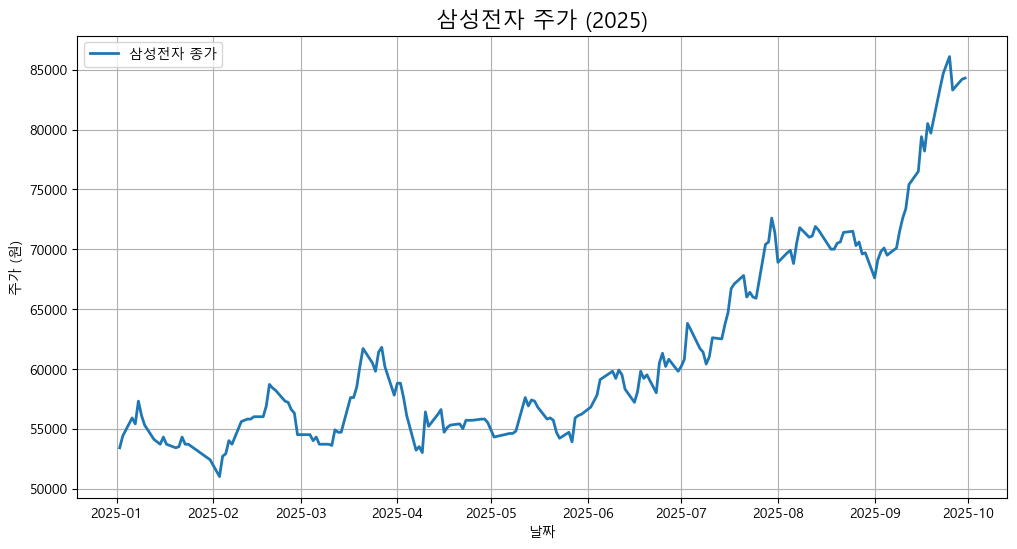

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='삼성전자 종가', linewidth=2)

plt.title('삼성전자 주가 (2025)', fontsize=16)
plt.xlabel('날짜')
plt.ylabel('주가 (원)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
import pandas as pd
dates = pd.date_range(start='2025-09-01', end='2025-09-05', freq='D')
print(dates)

DatetimeIndex(['2025-09-01', '2025-09-02', '2025-09-03', '2025-09-04',
               '2025-09-05'],
              dtype='datetime64[ns]', freq='D')


In [15]:
import pandas as pd
dates = pd.date_range('2025-09-01', periods=5, freq='D')
df = pd.DataFrame({'Close': [100, 101, 103, 104, 102]}, index=dates)
print(df)
print(df.index.year)
print(df.index.month)
print(df.index.day)

            Close
2025-09-01    100
2025-09-02    101
2025-09-03    103
2025-09-04    104
2025-09-05    102
Index([2025, 2025, 2025, 2025, 2025], dtype='int32')
Index([9, 9, 9, 9, 9], dtype='int32')
Index([1, 2, 3, 4, 5], dtype='int32')


In [17]:
# 1) 실제 삼성전자 데이터
df_stock = fdr.DataReader('005930', '2025-01-01')

# 2) 월 컬럼 생성
df_stock['Month'] = df_stock.index.month

# 3) 월별 평균 집계 → df2
df2 = (
    df_stock.groupby('Month')[['Close','Volume']]
            .mean()
            .round({'Close':0, 'Volume':0})
            .astype({'Close':'int64', 'Volume':'int64'})
).sort_index()

df2


,Close,Volume
Month,,
1,54361,19049492
2,55665,21231527
3,57260,20781396
4,55686,14604916
5,55653,14008875
6,59200,19171429
7,65087,21373552
8,70470,14147194
9,77043,18170117


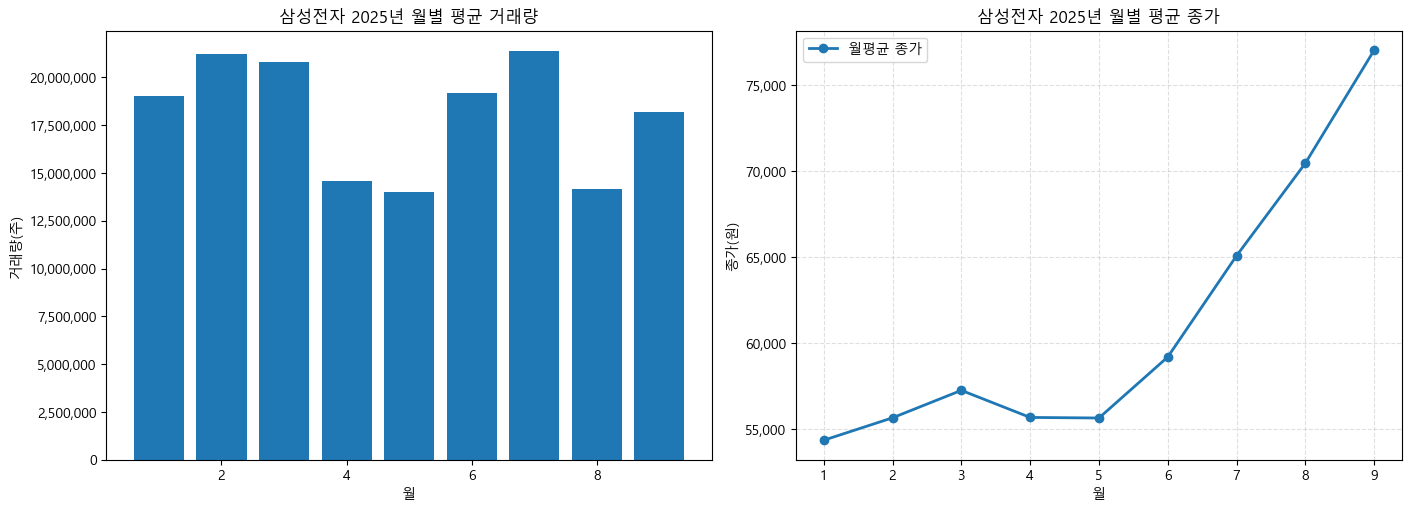

In [18]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# df2: index=Month(1~12), columns=['Close','Volume'] 라고 가정

def comma(x, pos):  # y축 숫자에 천 단위 콤마
    return f'{int(x):,}'
fmt = FuncFormatter(comma)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

# ── (왼쪽) 월별 평균 거래량 막대그래프
ax1.bar(df2.index, df2['Volume'])
ax1.set_title('삼성전자 2025년 월별 평균 거래량')
ax1.set_xlabel('월')
ax1.set_ylabel('거래량(주)')
ax1.yaxis.set_major_formatter(fmt)

# ── (오른쪽) 월별 평균 종가 선그래프
ax2.plot(df2.index, df2['Close'], marker='o', linewidth=2, label='월평균 종가')
ax2.set_title('삼성전자 2025년 월별 평균 종가')
ax2.set_xlabel('월')
ax2.set_ylabel('종가(원)')
ax2.grid(True, linestyle='--', alpha=0.4)
ax2.legend()
ax2.yaxis.set_major_formatter(fmt)

plt.show()


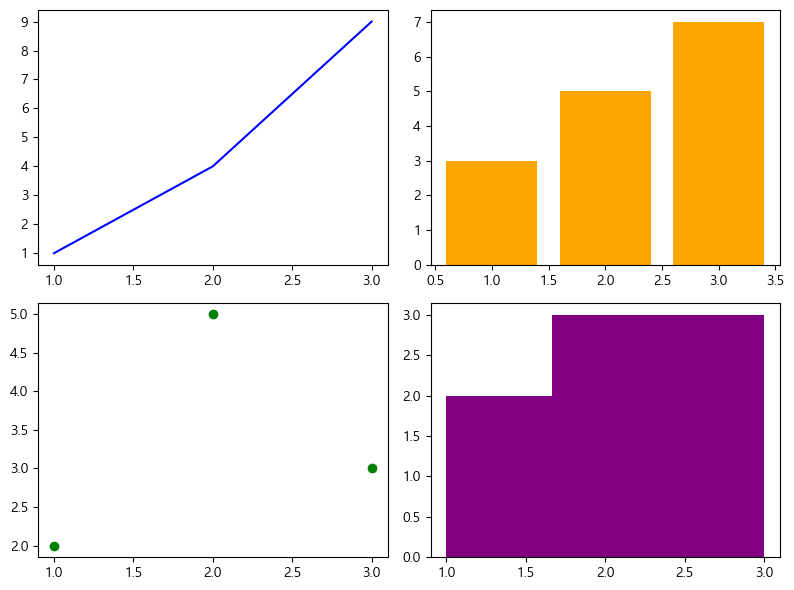

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# 각 축에 개별 그래프
ax1.plot([1, 2, 3], [1, 4, 9], color='blue')
ax2.bar([1, 2, 3], [3, 5, 7], color='orange')
ax3.scatter([1, 2, 3], [2, 5, 3], color='green')
ax4.hist([1, 2, 1, 2, 3, 3, 3, 2], bins=3, color='purple')

plt.tight_layout()
plt.show()


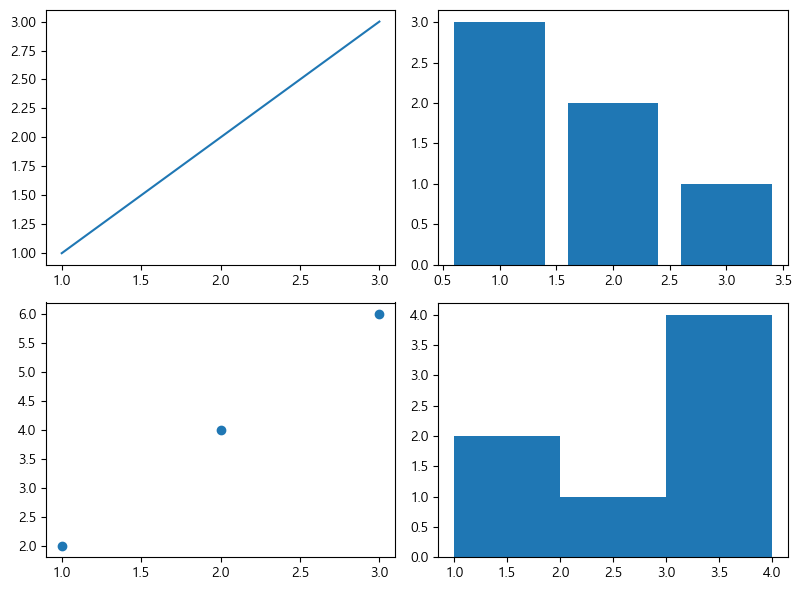

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(8, 6))

ax[0, 0].plot([1, 2, 3], [1, 2, 3])        # 왼쪽 위
ax[0, 1].bar([1, 2, 3], [3, 2, 1])         # 오른쪽 위
ax[1, 0].scatter([1, 2, 3], [2, 4, 6])     # 왼쪽 아래
ax[1, 1].hist([1, 1, 2, 3, 3, 3, 4], bins=3)  # 오른쪽 아래

plt.tight_layout()
plt.show()


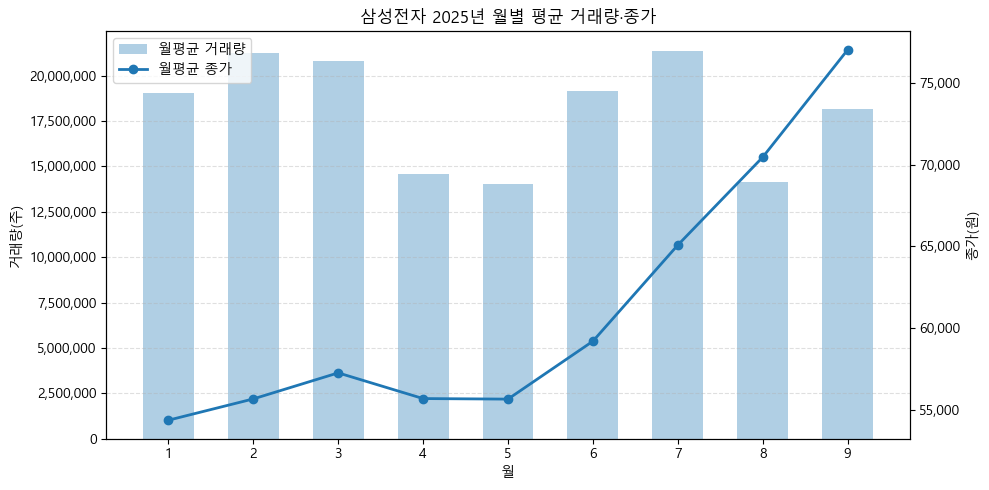

In [24]:
# ===== [셀 7] subplot + twinx 로 월평균 거래량(막대) + 월평균 종가(선) 한 그림에 =====
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def comma(x, pos):  # y축 숫자 콤마 포맷터
    try:
        return f'{int(x):,}'
    except Exception:
        return x

fig, ax1 = plt.subplots(figsize=(10, 5))   # 기본 축(왼쪽 Y축)
ax2 = ax1.twinx()                           # X축 공유, 오른쪽 Y축 생성

# 막대: 월평균 거래량 (왼쪽 Y축)
ax1.bar(df2.index, df2['Volume'], width=0.6, alpha=0.35, label='월평균 거래량')
ax1.set_ylabel('거래량(주)')
ax1.yaxis.set_major_formatter(FuncFormatter(comma))

# 선: 월평균 종가 (오른쪽 Y축)
ax2.plot(df2.index, df2['Close'], marker='o', linewidth=2, label='월평균 종가', color='C0')
ax2.set_ylabel('종가(원)')
ax2.yaxis.set_major_formatter(FuncFormatter(comma))

# 공통 설정
ax1.set_title('삼성전자 2025년 월별 평균 거래량·종가')
ax1.set_xlabel('월')
ax1.set_xticks(df2.index)
ax1.grid(True, axis='y', linestyle='--', alpha=0.4)

# 범례(좌/우 합쳐서 표시)
lines, labels = [], []
for ax in (ax1, ax2):
    L = ax.get_legend_handles_labels()
    lines += L[0]; labels += L[1]
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()


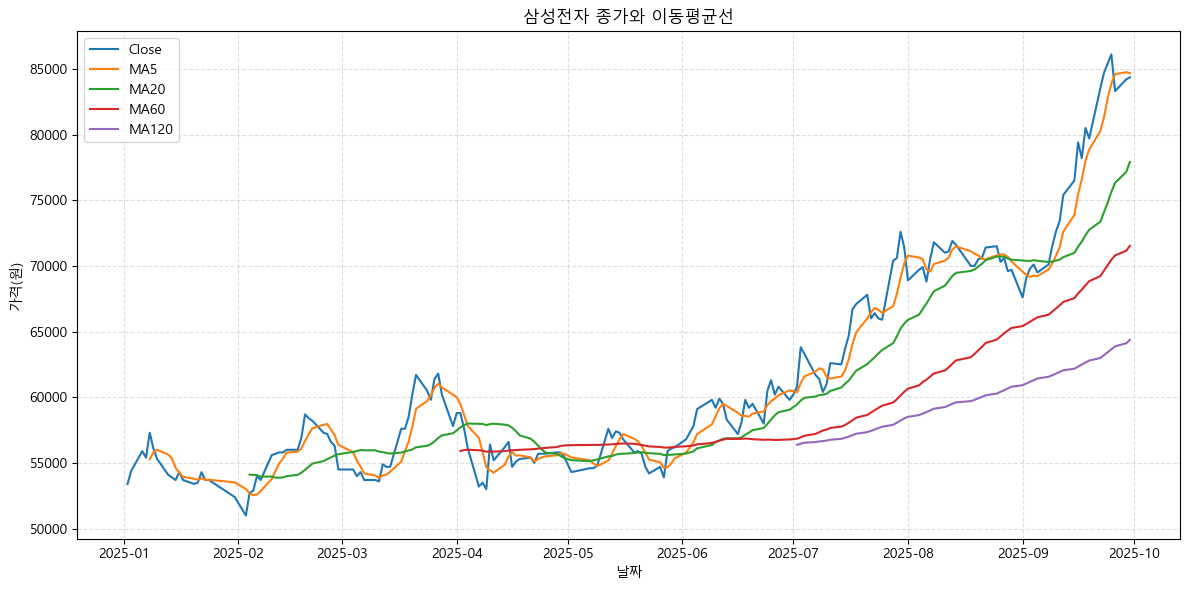

In [25]:
# ===== [셀 8] 이동평균선(MA5, MA20, MA60, MA120) 금융 차트 =====
import matplotlib.pyplot as plt

# 이동평균 계산
df_stock = df_stock.copy()
df_stock['MA5']   = df_stock['Close'].rolling(window=5).mean()     # 단기선
df_stock['MA20']  = df_stock['Close'].rolling(window=20).mean()    # 단기/중기
df_stock['MA60']  = df_stock['Close'].rolling(window=60).mean()    # 중기선
df_stock['MA120'] = df_stock['Close'].rolling(window=120).mean()   # 장기선

# 차트
plt.figure(figsize=(12, 6))
plt.plot(df_stock.index, df_stock['Close'], label='Close', linewidth=1.5)
plt.plot(df_stock.index, df_stock['MA5'],   label='MA5')
plt.plot(df_stock.index, df_stock['MA20'],  label='MA20')
plt.plot(df_stock.index, df_stock['MA60'],  label='MA60')
plt.plot(df_stock.index, df_stock['MA120'], label='MA120')

plt.title('삼성전자 종가와 이동평균선')
plt.xlabel('날짜'); plt.ylabel('가격(원)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

# (참고 설명)
# • 단기선(MA5)이 장기선(MA60/MA120)을 상향 돌파 → 골든크로스(상승 신호로 해석되기도 함)
# • 단기선이 장기선을 하향 돌파 → 데드크로스(하락 신호로 해석되기도 함)


In [26]:
# ===== [셀 9-1] 선형회귀 학습: X(오늘 종가) → y(내일 종가) =====
# !pip install scikit-learn  # (필요 시 한 번만 설치)

from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# X: 오늘 종가, y: 내일 종가  (길이를 맞추기 위해 1칸 시프트)
X = df_stock['Close'][:-1].to_frame(name='today_close')   # 2D (DataFrame)
y = df_stock['Close'][1:].values                          # 1D (ndarray)

model = LinearRegression()
model.fit(X, y)

print("기울기(β1):", model.coef_[0])
print("절편(β0):", model.intercept_)

# --- (참고) numpy reshape로 동일하게 해도 됨 ---
# X_np = df_stock['Close'][:-1].values.reshape(-1, 1)
# y_np = df_stock['Close'][1:].values
# model.fit(X_np, y_np)


기울기(β1): 1.0085914798531863
절편(β0): -356.82463783169806


C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


마지막 날 종가: 84,350원
예측되는 다음 종가: 84,718원


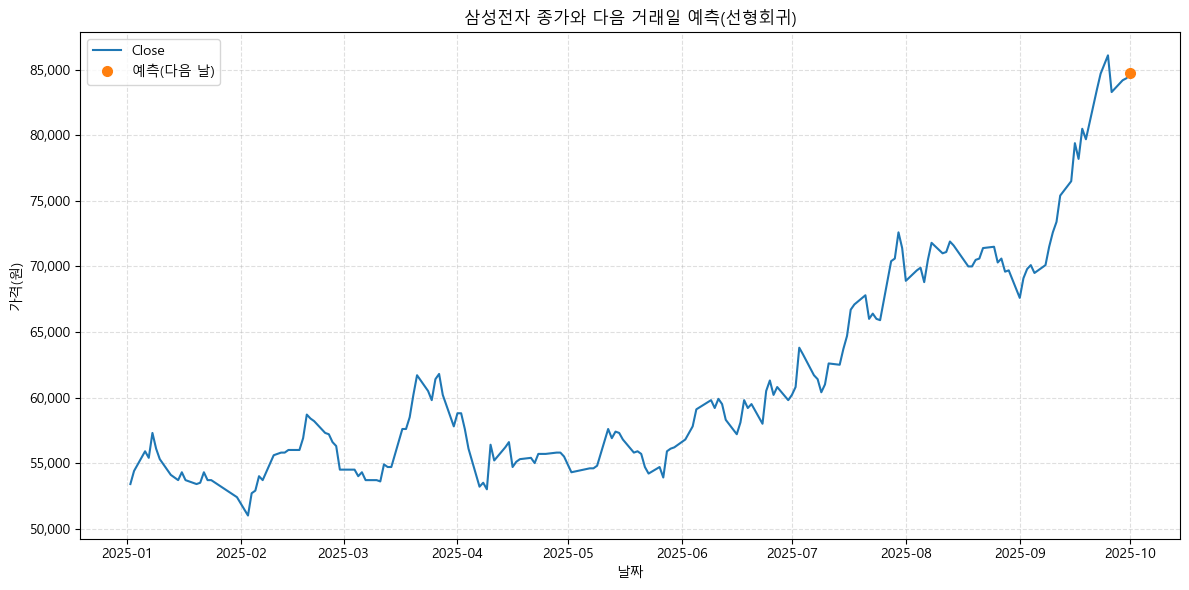

In [28]:
# ===== [셀 9-2] 다음 거래일 종가 예측 + 시각화 (수정본) =====
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

# 예측
last_close = df_stock['Close'].iloc[-1]              # 가장 최근 종가
next_pred  = float(model.predict([[last_close]])[0]) # 다음 거래일 예측값 -> float로 변환

print(f"마지막 날 종가: {last_close:,.0f}원")
print(f"예측되는 다음 종가: {next_pred:,.0f}원")

# 시각화: 실제 종가 시계열 + 예측 점(다음 날)
next_day = df_stock.index[-1] + pd.Timedelta(days=1)

def comma(x, pos):
    try:
        return f"{int(x):,}"
    except Exception:
        return x

plt.figure(figsize=(12, 6))
plt.plot(df_stock.index, df_stock['Close'], label='Close', linewidth=1.5)
plt.plot([next_day], [next_pred], 'o', label='예측(다음 날)', markersize=7)

plt.title('삼성전자 종가와 다음 거래일 예측(선형회귀)')
plt.xlabel('날짜'); plt.ylabel('가격(원)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()W
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma))
plt.tight_layout()
plt.show()
